In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


import datetime

import joblib


# from cap_modules import *

pd.set_option('display.max_columns', None)

In [2]:
enc_df = pd.read_csv('data/enc_df.csv', sep = ',')

In [3]:
enc_df_test = pd.read_csv('data/enc_df_test.csv', sep = ',')

In [4]:
X_train = enc_df.drop('is_fraud', axis = 1, inplace=False)
y_train = enc_df['is_fraud']

In [5]:
X_test = enc_df_test.drop('is_fraud', axis = 1, inplace=False)
y_test = enc_df_test['is_fraud']

Decision Tree

In [6]:
dt = DecisionTreeClassifier(random_state = 42)

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
result_array = []
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)
obj = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model': 'dt'}
result_array.append(obj)
result_array

[{'fpr': array([0.        , 0.00183354, 0.00183715, 0.00215509, 0.00216051,
         0.00230322, 0.00237367, 0.00237547, 0.00242063, 0.00245134,
         0.00245676, 1.        ]),
  'tpr': array([0.        , 0.61398601, 0.61398601, 0.61491841, 0.61491841,
         0.61538462, 0.61538462, 0.61538462, 0.61585082, 0.61631702,
         0.61631702, 1.        ]),
  'roc_auc': 0.8071191598922308,
  'model': 'dt'}]

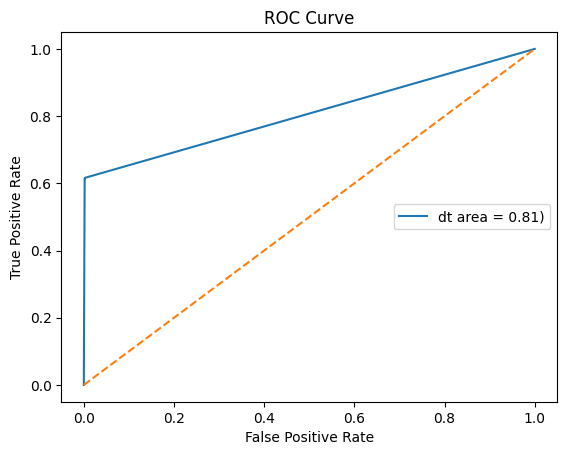

In [10]:
def show_roc_plot(array):
    fig = plt.figure()
    for ar in array:
        plt.plot(ar['fpr'], ar['tpr'], label=f'{ar["model"]} area = {ar["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='right')
    plt.show()

show_roc_plot(result_array)

In [11]:
accuracy = dt.score(X_test, y_test)
accuracy

0.9966799767508399

In [12]:
accuracy = dt.score(X_train, y_train)
accuracy

0.9996514161220044

In [13]:
y_pred_dt_test = dt.predict(X_test)
y_pred_dt_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred_dt_test)
class_report = classification_report(y_test, y_pred_dt_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9996514161220044
Confusion Matrix:
 [[552557   1017]
 [   828   1317]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.61      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.81      0.79    555719
weighted avg       1.00      1.00      1.00    555719



Text(50.722222222222214, 0.5, 'Actual')

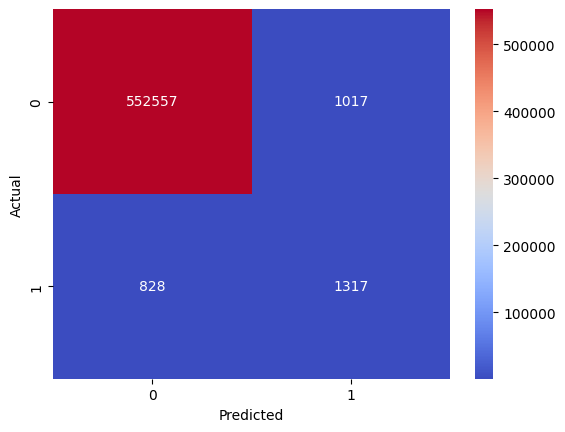

In [15]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [16]:
param_grid = {
    'max_depth': [None, 5, 10, 20, 30]
}

In [17]:
gs = GridSearchCV(dt, param_grid, cv=5)

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20, 30]})

In [19]:
best_model = gs.best_estimator_
best_model

DecisionTreeClassifier(max_depth=10, random_state=42)

In [20]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9976696855785028
Confusion Matrix:
 [[552978    596]
 [   699   1446]]


Text(50.722222222222214, 0.5, 'Actual')

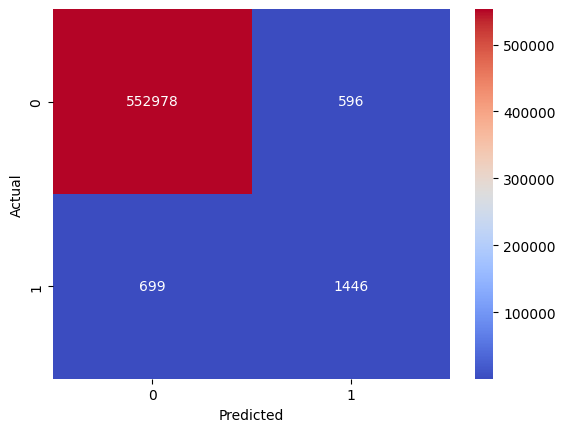

In [21]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [22]:
y_pred_dt = best_model.predict_proba(X_test)[:, 1]
y_pred_dt

array([2.99098716e-05, 4.91561527e-04, 9.51835536e-06, ...,
       9.51835536e-06, 8.31283987e-04, 9.51835536e-06])

In [23]:
result_array = []
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)
obj = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model': 'dt'}
result_array.append(obj)
result_array

[{'fpr': array([0.00000000e+00, 1.04773707e-04, 1.10193037e-04, 1.15612366e-04,
         1.24644582e-04, 1.30063912e-04, 1.31870355e-04, 2.29418289e-04,
         2.33031176e-04, 2.65547154e-04, 2.67353597e-04, 2.81805143e-04,
         2.90837359e-04, 2.94450245e-04, 3.07095348e-04, 3.43224212e-04,
         3.45030655e-04, 4.44385033e-04, 4.55223692e-04, 4.58836578e-04,
         4.67868794e-04, 4.76901011e-04, 5.13029875e-04, 5.18449205e-04,
         5.41932967e-04, 6.79222651e-04, 6.91867754e-04, 7.00899970e-04,
         7.22577289e-04, 8.52641201e-04, 8.65286303e-04, 8.74318519e-04,
         8.85157179e-04, 8.86963622e-04, 8.97802281e-04, 9.03221611e-04,
         9.05028054e-04, 9.06834497e-04, 1.01522109e-03, 1.02786619e-03,
         1.02786619e-03, 1.07664016e-03, 1.12180124e-03, 1.13986567e-03,
         1.14167212e-03, 1.15612366e-03, 1.15793011e-03, 1.16696232e-03,
         1.23560716e-03, 1.26451026e-03, 1.26992958e-03, 1.28257469e-03,
         1.30605845e-03, 1.32412288e-03, 1.3

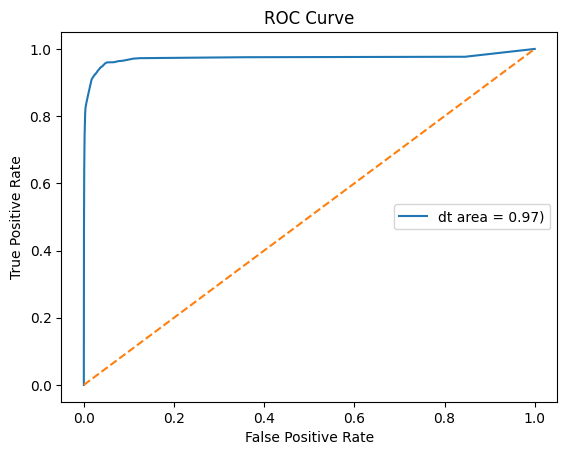

In [24]:
show_roc_plot(result_array)